# SPEED DATING PROJECT

# Informations :

Ce dataset, basé sur du Speed Dating, est le résultat d'une expérience de la Columbia Business School aux U.S.A. , qui essaie de découvrir ce qui influence l'"Amour" à première vue.

Avec une durée de 4 minutes, on a demandé aux participants s'ils souhaitaient revoir les personnes qu'ils/elles ont rencontré durant les mini dates. Ils ont également été invités à évaluer leur partenaire et à partager leurs attentes et critères qui contribuent au "match" entre les deux.

On va essayer  de trouver, grâce à des mécanismes ou caractéristiques des candidats, ce qui pourrait créer un déclic pour revoir la personne.

Nous avons décidé de donner brièvement un aperçu des moteurs structurels (sexe, âge, profession, origines/religions, et.) de cet événement puis nous concentrerons notre analyse des données sur :
 - le groupe qui obtient au moins un match et une date
 - quelles sont les raisons intérieures qui favorisent l'obtention d'un rendez-vous avec un match

Notre objectif va être de comprendre ce qui se passe lors d'un speed dating et surtout de comprendre ce qui va influencer l'obtention d'un deuxième rendez-vous.


# Import librairies and data

In [1]:
!pip install plotly==4.9.0 -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None) # We want to see all the columns

In [4]:
speed_dating = pd.read_csv("Speed_Dating_Data (1).csv", encoding='ISO-8859-1') 
#modification encoding pour qu'il soit lu
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [5]:
speed_dating.describe(include = 'all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
print("Number of rows is : {} Number of columns is : {} ".format(speed_dating.shape[0], speed_dating.shape[1]))

Number of rows is : 8378 Number of columns is : 195 


In [7]:
print("Percentage of missing values: ")
display(100*speed_dating.isnull().sum()/speed_dating.shape[0])

Percentage of missing values: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [8]:
missing_values = speed_dating.isna().mean()*100
mask= missing_values < 55
data_clean= speed_dating.loc[:, mask]
data_clean.shape


(8378, 161)

Cleaning the dataset and remove columns with more than 55% of missing values.

Nous pouvons constaster qu'il y a 8 378 lignes et de nombreuses colonnes comportant des NaN. Lors de cette analyse, il faut être vigilant sur les imputations, car elles pourraient modifier les données des graphiques. On remarque également qu'il existe un très grand nombre de variables. J'ai donc décidé de me concentrer sur (sexe, âge, profession, origines/religions, race et.) des participants pour décrocher un deuxième rendez-vous.

**We want to keep only the variables that will be useful**

In [9]:
data_clean = data_clean[['iid','gender','condtn','wave', 'round','pid','goal','match','int_corr','samerace','age_o','race_o','age','field_cd','race','imprace', 'imprelig', 'from','income','date','go_out','career_c','dec','numdat_2','you_call','them_cal','date_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','field','exphappy',]]
data_clean.columns

Index(['iid', 'gender', 'condtn', 'wave', 'round', 'pid', 'goal', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'age', 'field_cd', 'race',
       'imprace', 'imprelig', 'from', 'income', 'date', 'go_out', 'career_c',
       'dec', 'numdat_2', 'you_call', 'them_cal', 'date_3', 'attr1_3',
       'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr3_3',
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'field', 'exphappy'],
      dtype='object')

 **We rename the column names to clearly look the dataset**

In [10]:
#on remplace le nom des colonnes afin d'avoir une meilleure lisibilité
#sur les données de chaque colonne
data_clean = data_clean.rename(columns={"iid": "candidate_id",
                                            "condtn": "choice",
                                            "goal": "goal",
                                            "round": "candidates_wave",
                                            "pid":"partner_id",
                                            "int_corr":"canidates_correl",
                                            "samerace":"equal_race",
                                            "age_o":"age_partner",
                                            "race_o":"race_partner",
                                            "age":"age_candidate",
                                            "field_cd":"field_of_study",
                                            "race":"race_candidate",
                                            "imprace":"race_importance",
                                            "imprelig":"religion_importance",
                                            "from" : "city",
                                            "date":"date_frequence",
                                            "go_out":"go_out_frequence",
                                            "career_c":"career_candidate",
                                            "exhappy":"Happy_to_meet_people",
                                            "dec":"decision",
                                            "numdat_2":"nbr_dates",
                                            "you_call":"callback_to_match",
                                            "them_cal":"callback_from_match",
                                            "date_3":"dateafter_callmatch",
                                            "attr1_3":"lookfor_attractive",
                                            "sinc1_3":"lookfor_sincere",
                                            "intel1_3":"lookfor_intelligent",
                                            "fun1_3":"lookfor_fun",
                                            "amb1_3":"lookfor_ambitious",
                                            "shar1_3":"lookfor_sharedint",        
                                            "attr3_3":"ownattributes_attractive",
                                            "sinc3_3":"ownattributes_sincere",
                                            "intel3_3":"ownattributes_intelligent",
                                            "fun3_3":"ownattributes_fun",
                                            "amb3_3":"ownattributes_ambitious",
                                            "shar3_3":"ownattributes_sharedint"                                     
                                           })

data_clean

,candidate_id,gender,choice,wave,candidates_wave,partner_id,goal,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious,field,exphappy
0,1,0,1,1,10,11.0,2.0,0,0.14,0,27.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
1,1,0,1,1,10,12.0,2.0,0,0.54,0,22.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
2,1,0,1,1,10,13.0,2.0,1,0.16,1,22.0,4.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
3,1,0,1,1,10,14.0,2.0,1,0.61,0,23.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
4,1,0,1,1,10,15.0,2.0,1,0.21,0,24.0,3.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,2,21,22,526.0,1.0,0,0.64,0,26.0,3.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0,Climate Dynamics,10.0
8374,552,1,2,21,22,527.0,1.0,0,0.71,0,24.0,6.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0,Climate Dynamics,10.0
8375,552,1,2,21,22,528.0,1.0,0,-0.46,0,29.0,3.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0,Climate Dynamics,10.0
8376,552,1,2,21,22,529.0,1.0,0,0.62,0,22.0,4.0,25.0,18.0,2.0,1.0,1.0,France,NaN,2.0,1.0,15.0,0,2.0,2.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,8.0,5.0,7.0,6.0,7.0,Climate Dynamics,10.0


In [11]:
display(data_clean.head())
print('the shape of the new  dataset is : {} '.format(data_clean.shape))

,candidate_id,gender,choice,wave,candidates_wave,partner_id,goal,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,decision,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious,field,exphappy
0,1,0,1,1,10,11.0,2.0,0,0.14,0,27.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
1,1,0,1,1,10,12.0,2.0,0,0.54,0,22.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
2,1,0,1,1,10,13.0,2.0,1,0.16,1,22.0,4.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
3,1,0,1,1,10,14.0,2.0,1,0.61,0,23.0,2.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0
4,1,0,1,1,10,15.0,2.0,1,0.21,0,24.0,3.0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",7.0,1.0,NaN,1,1.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0,Law,3.0


the shape of the new  dataset is : (8378, 40) 


# Data Analysis 

**1.Age Analysis**

In [12]:
data_clean['gender']= data_clean['gender'].replace((0,1), ('Female','Male'))
data_clean[['gender', 'age_candidate']].groupby('gender').agg(['mean', 'max'])


age_candidate      
                mean   max
gender                    
Female     26.105851  55.0
Male       26.609270  42.0

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Age Distribution')]

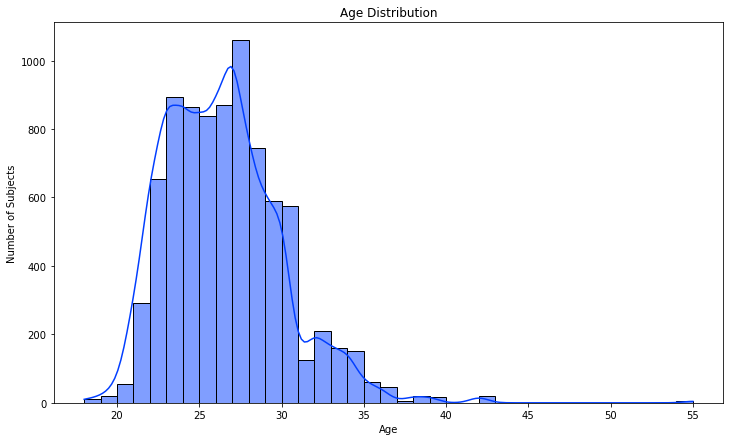

In [13]:
#Age Distribution using Seaborn
plt.figure(figsize=(12, 7))
sns.set_palette('bright')
ax = sns.histplot(data_clean['age_candidate'], kde=True,binwidth=1, )
ax.set(xlabel="Age", ylabel="Number of Subjects", title="Age Distribution")

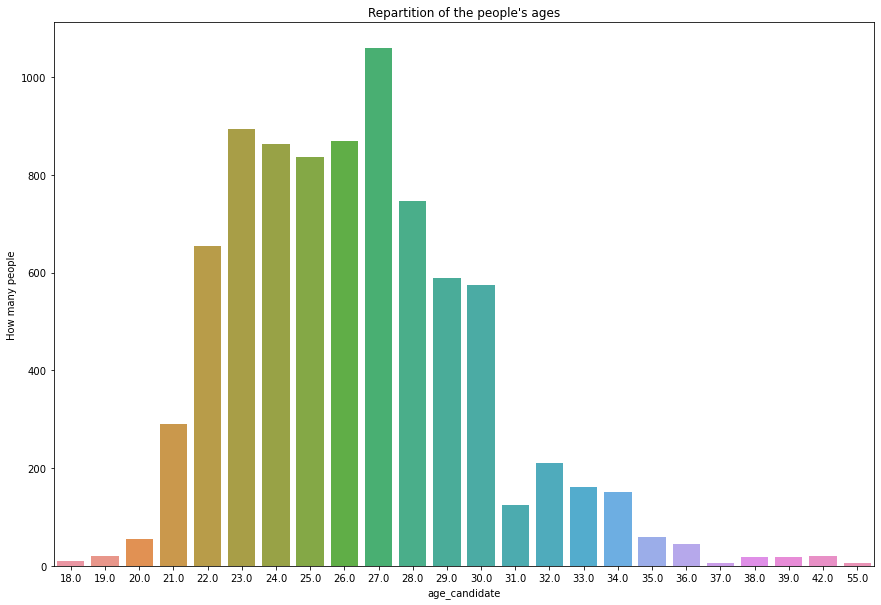

In [14]:
plt.figure(figsize=(50,10))

# Second chart : age 
plt.subplot(132)
ax2 = sns.countplot(x = data_clean["age_candidate"]);
ax2.set_ylabel("How many people")
ax2.set_title("Repartition of the people's ages")

plt.show();

**OBSERVATION**
- la plupart des participants agés entre 23 et 30
- Les personnes âgées sont à peine intéressées par le speed dating

**2.Gender Analysis**

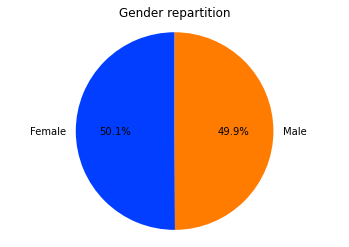

<Figure size 864x720 with 0 Axes>

In [15]:
labels = data_clean['gender'].unique()
sizes = data_clean['gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%' , startangle=90)
ax.axis('equal')
plt.title('Gender repartition')
plt.figure(figsize = (12, 10))
plt.show()


**OBSERVATION**
- on remarque que les hommes et les femmes sont representés de mannière égale


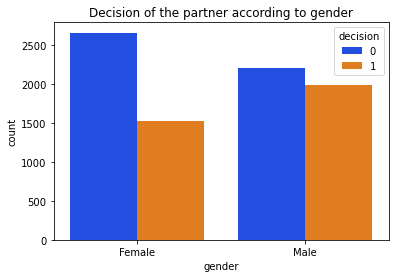

In [16]:
sns.countplot(hue='decision', x='gender', data=data_clean)
plt.title('Decision of the partner according to gender')
plt.show()

**OBSERVATION**
- Les deux sexes sont également intéressés par Speed Dating
- les hommes semblent être plus souvent rejetés par les femmes alors que c'est l'inverse pour les femmes


****3.Race Analysis****

In [17]:
# Input race of candidate
#Modifier les labels de race_candidate  pour améliorer la compréhention du graph
data_clean['race_candidate'] = data_clean['race_candidate'].apply(lambda x: 'Black/African' if x == 1 
                                                else 'European/Caucasian' if x == 2 
                                                else 'Latino/Hispanic' if x == 3
                                                else 'Asian/Pacific/Islander' if x == 4
                                                else 'Native American' if x == 5
                                                else 'other' if x == 6
                                                else  x
                                                )

<Figure size 1080x1080 with 0 Axes>

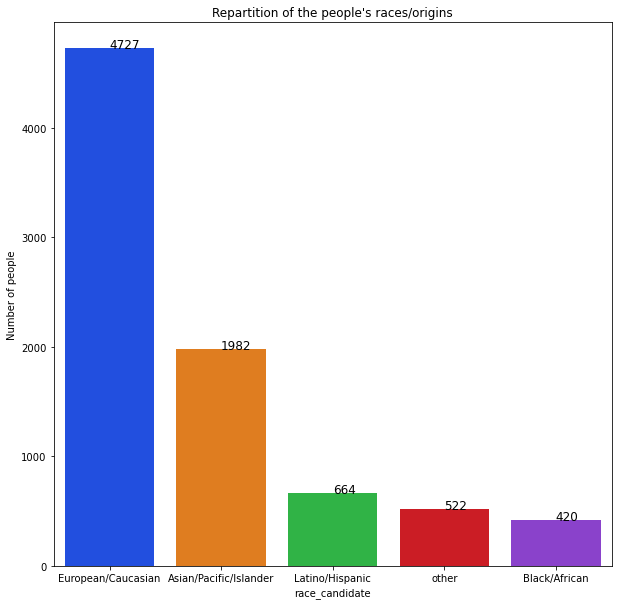

<Figure size 1080x1080 with 0 Axes>

In [18]:
plt.figure(figsize=(10,10))

plt.subplot() 
ax = sns.countplot(x = data_clean["race_candidate"], 
                    order = ["European/Caucasian", "Asian/Pacific/Islander", "Latino/Hispanic","other", "Black/African"]);
ax.set_ylabel("Number of people")
ax.set_title("Repartition of the people's races/origins")
for i in ax.patches: #loop to print value of people on top of the bars
    ax.text(i.get_x() +0.40, i.get_height()+0.08,str(round((i.get_height()), 1)),fontsize = 12)
plt.figure(figsize=(15,15))


<AxesSubplot:ylabel='candidate_id'>

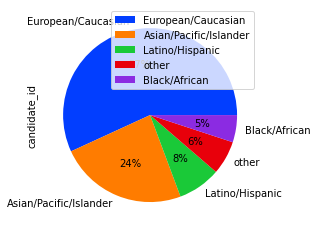

In [19]:
(
data_clean
    .groupby(["race_candidate"])
    [["match", "candidate_id"]]
   .count()
    .sort_values("match", ascending=False)
    .head(100)
).plot.pie(y="candidate_id", autopct='%1.0f%%')

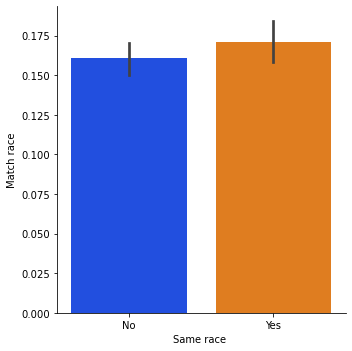

In [20]:
p = sns.catplot(x = 'equal_race', y = 'match', data = data_clean, kind = 'bar')
p.set_ylabels('Match race')
p.set_xlabels('Same race ')
p.set_xticklabels(["No","Yes"])

plt.show()

**OBSERVATION**
- Les participants sont majoritairement européens
- La plupart des matchs étaient avec des européens/caucasiens, américains, les moins étaient noirs/afro-américains
- Il apparaît d'abord qu'une race commune facilite un peu le match, mais vu les intervalles de confiance on peut dire que ce n'est pas vraiment significatif

**4.Goal Analysis**

In [21]:
# Input  goal of candidate 
data_clean['goal'] = data_clean['goal'].apply(lambda x:'Seemed like a fun night out' if x == 1 
                                                else 'To meet new people' if x == 2 
                                                else 'To get a date' if x == 3
                                                else 'Looking for a serious relationship' if x == 4
                                                else 'To say I did it' if x == 5
                                                else 'Other' if x == 6
                                                else  x
                                                )

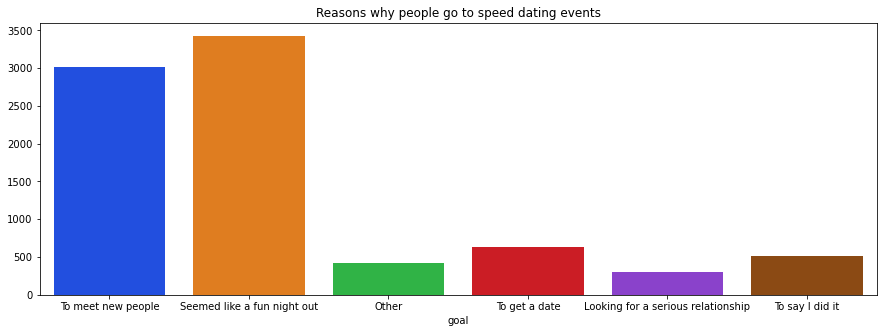

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='goal', data=data_clean)
plt.ylabel('')
plt.title("Reasons why people go to speed dating events")
plt.show()

**OBSERVATION**
- La plupart des gens on dirait  qu'ils étaient venus ici principalement pour s'amuser et rencontrer de nouvelles personnes, pas pour trouver l'amour ou même un rendez-vous
- Obtenir un rendez-vous ou une relation sérieuse ne sont pas l'objectif premier des participants

**5.Religion Analysis**

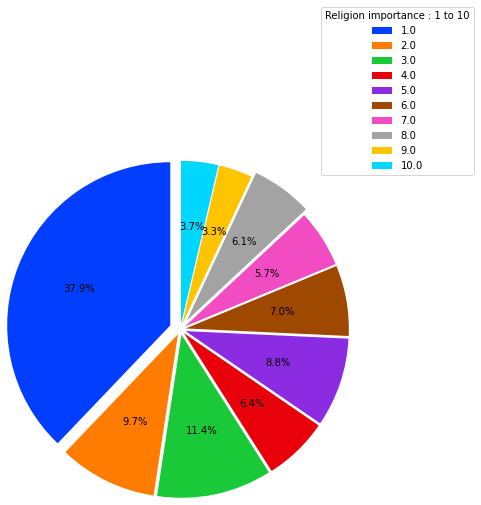

In [23]:
# Results of candidates for whom religion matters
religion = data_clean.groupby(['religion_importance'])['candidate_id'].nunique()

plt.figure(figsize = (7, 5))
plt.pie(
    religion, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05,0.1,0.05, 0.05),
    radius = 1.5 
       )

plt.legend(religion.index, title = 'Religion importance : 1 to 10', bbox_to_anchor=(1.0, 1.05))

plt.show()

**OBSERVATION**
- la religion n'est pas si importante pour les participants 

**6.field of study Analysis**

In [24]:
# Input field of study from partner
data_clean['field_of_study'] = data_clean['field_of_study'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x 
                                                   
                                                   )

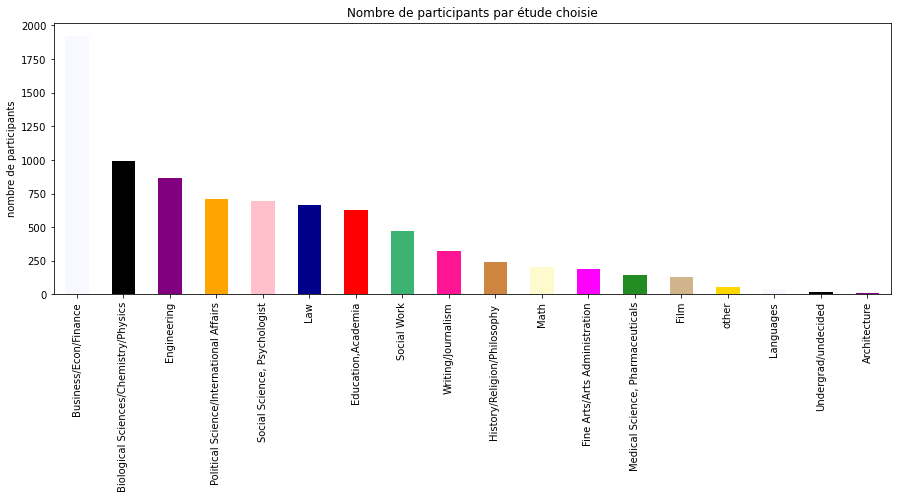

In [25]:
data = data_clean['field_of_study'].value_counts()
data.plot(kind='bar',
                    title='Nombre de participants par étude choisie',
                    ylabel='nombre de participants',
            
                    color=['ghostwhite','black','purple','orange','pink','darkblue','r',
                           'mediumseagreen','deeppink','peru','lemonchiffon',
                           'fuchsia','forestgreen','tan','gold'],
                    figsize=(15, 5),
                    legend = False)
plt.show()

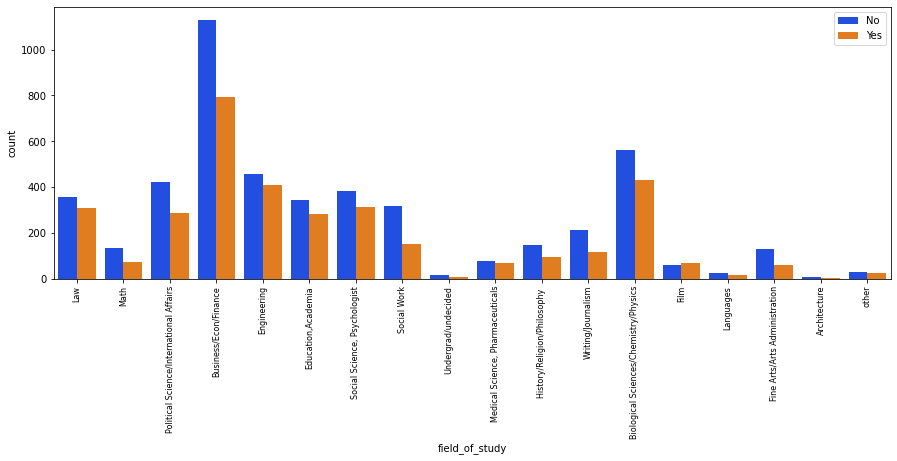

In [26]:
plt.figure(figsize=(15,5))
plt.subplot()
sns.countplot(hue='decision', x='field_of_study', data=data_clean)
plt.xticks(size=8,rotation=90)
plt.legend(['No', 'Yes'])

**OBSERVATION**
- Il semble que seul le fait de travailler dans les sciences médicales, pharmaceutiques ou biotechnologiques puisse vous donner une meilleure chance d'obtenir oui que non de votre partenaire. Ingénieur ne semble pas être un bon travail pour le matching

**7.Happiness expectation repartition Analysis**

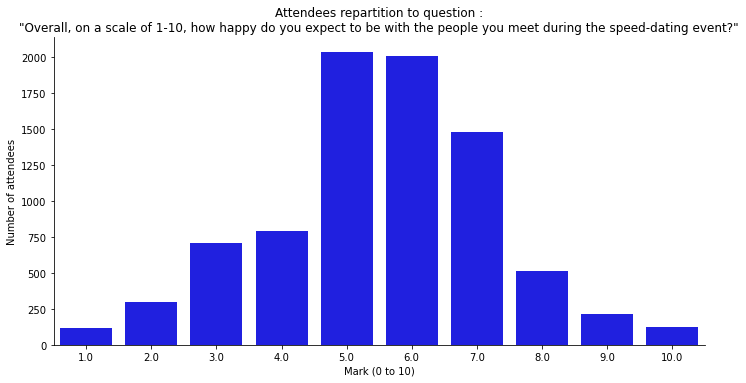

In [27]:
p = sns.catplot(x = 'exphappy',
            y = 'candidate_id',
            data = data_clean.groupby('exphappy').count().reset_index(),
            kind = 'bar',
            height = 5,
            aspect = 2,
            color = "b")

p.set(title="Attendees repartition to question :\n\"Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?\"")
p.set_xlabels("Mark (0 to 10)")
p.set_ylabels("Number of attendees")

plt.show()

**OBSERVATION**
- La plupart des gens qui sont entre 5 et 7 peu enthousiastes à propos de l'événement, mais pas tellement

**8.Date frequency Analysis**

In [28]:
# Input date frequency 
data_clean['date_frequence'] = data_clean['date_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )
# Input go out frequency 
data_clean['go_out_frequence'] = data_clean['go_out_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )

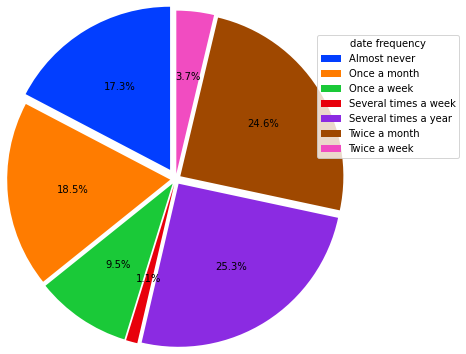

In [29]:
date_fr = data_clean.groupby(['date_frequence'])['match'].count()

plt.figure(figsize = (7, 5))
plt.pie(
    date_fr, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05),
    radius = 1.5 
       )

plt.legend(date_fr.index, title = 'date frequency', bbox_to_anchor=(1.0, 1.05))

plt.show()

**OBSERVATION**
- 25% des personnes qui vont à un rendez-vous deux fois par mois ou plusieurs fois par an ont plus de matchs 

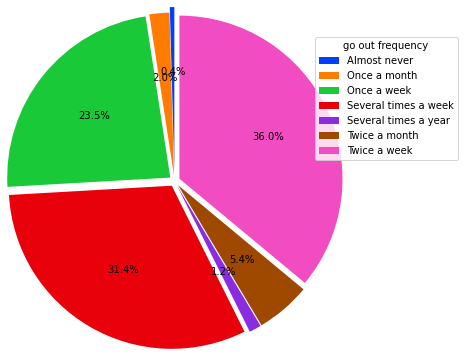

In [30]:
go_fr = data_clean.groupby(['go_out_frequence'])['match'].count()

plt.figure(figsize = (7, 5))
plt.pie(
    go_fr, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05),
    radius = 1.5 
       )

plt.legend(go_fr.index, title = 'go out frequency ', bbox_to_anchor=(1.0, 1.05))

plt.show()

**OBSERVATION**
- Ceux qui sortent fréquemment ont plus de matchs


**9.Contact after speed dating**

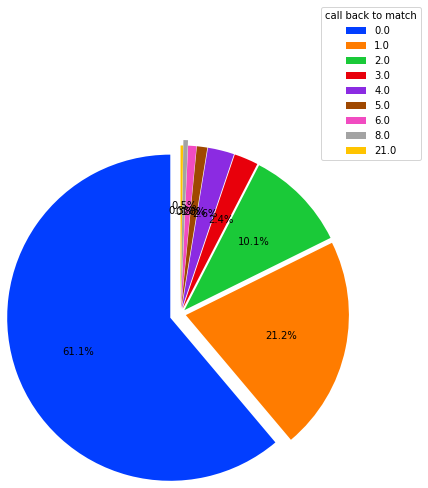

In [28]:
call_back = data_clean.groupby(['callback_to_match'])['match'].count()

plt.figure(figsize = (7, 5))
plt.pie(
    call_back, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05,0.1,0.05),
    radius = 1.5 
       )

plt.legend(call_back.index, title = 'call back to match', bbox_to_anchor=(1.0, 1.05))
plt.show()

**OBSERVATION**
- La plupart des participants n'ont pas atteint leurs dates

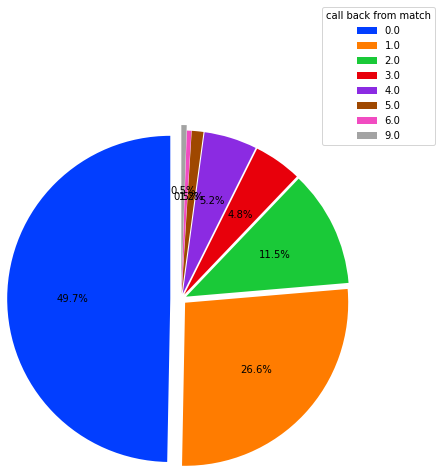

In [29]:
call_match = data_clean.groupby(['callback_from_match'])['match'].count()

plt.figure(figsize = (7, 5))
plt.pie(
    call_match, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05, 0.05,0.05,0.05,0.05,0.05,0.1),
    radius = 1.5 
       )

plt.legend(call_match.index, title = 'call back from match', bbox_to_anchor=(1.0, 1.05))
plt.show()

**OBSERVATION**
- 49.7% des participants n'ont pas reçu d'appels de leurs correspondants, 26.6% n'ont reçu qu'un seul appel

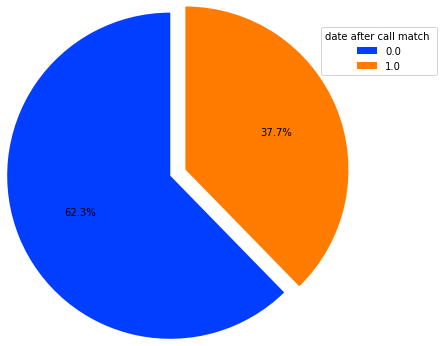

In [31]:
date_aft = data_clean.groupby(['dateafter_callmatch'])['match'].count()

plt.figure(figsize = (7, 5))
plt.pie(
    date_aft, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    explode = (0.1, 0.05),
    radius = 1.5 
       )

plt.legend(date_aft.index, title = 'date after call match ', bbox_to_anchor=(1.0, 1.05))
plt.show()

**OBSERVATION**
- 62% des participants n'ont pas obtenu de second date.

## Conclusion
- 62% des participants n'ont pas obtenu de dates des expériences Ceux qui sortent souvent ont plus de matchs
- 50% des participants n'ont pas reçu d'appels de leurs correspondants, 27% n'ont reçu qu'un seul appel
- Les personnes qui avaient pour objectif d'organiser une soirée entre fans et de rencontrer de nouvelles personnes ont tiré plus de  matchs
- La religion et la race ne sont pas si importantes pour le matching
-  Grâce à l’analyse, nous avons pu apprendre davantage sur les caractéristiques des participants en segmentant plusieurs paramètres tels que, le genre, l’âge, le domaine d’étude, l’ethnie,,, 
- Nous pourrions également approfondir cette étude en s’intéressant à d’autres items